In [1]:
from i_o import Paths
import numpy as np
import cupy as cp
import matplotlib.pyplot as plt
from tqdm.auto import tqdm
import os, glob, h5py
import importlib, pathlib
from daio.h5 import lazyh5
from video import create_projection_image, showvid
import warpfield
from IPython.display import JSON

/home/lubo12/.conda/envs/lfm1/lib/python3.12/site-packages/cupyx/jit/_interface.py:173: FutureWarning: cupyx.jit.rawkernel is experimental. The interface can change in the future.
  cupy._util.experimental('cupyx.jit.rawkernel')


In [2]:
pn_out = r"~/hpc-rw/lfm/results"
includes = ['']
excludes = []

recs = [os.path.basename(rec) for rec in sorted(glob.glob(os.path.expanduser(os.path.join(pn_out, '*'))), reverse=True) if os.path.exists(os.path.join(pn_out, rec, 'deconvolved.h5'))]
recs = [rec for rec in recs if all([s in rec for s in includes]) and not any([s in rec for s in excludes])]
print('\n'.join(recs))

20250701_1625_LB_ZF_v552_f7_40fps_2
20250701_1622_LB_ZF_v552_f7_40fps_1
20250701_1605_LB_ZF_v552_f6_40fps_1
20250701_1538_LB_ZF_v552_f5_40fps_1
20250701_1501_LB_ZF_v552_f3_40fps_2
20250514_1635_LF_ZF552_f4_1_comp_40fps
20250514_1515_LF_ZF552_f1_4_uncomp_40fps
20250513_1351_LB_redFB_1-1k_3d_with_movement


In [3]:
pn_psfs = r"~/hpc-rw/lfm/psfs"
pn_rec = r"~/hpc-r/lfm2025/recordings"
pn_bg = r"~/hpc-rw/lfm/bg"
url_home = r"/home/lubo12/"
pn_out = r"~/hpc-rw/lfm/results"

dataset_name = "20250701_1501_LB_ZF_v552_f3_40fps_2"
psf_name = "20250701_1216_PSF_LB_noap_1"
bg_name = "20250701_1651_LB_bg_40fps.npy"

paths = Paths(dataset_name=dataset_name,
              psf_name = psf_name,
              bg_name=bg_name,
              pn_bg= pn_bg,
              pn_rec = pn_rec,
              pn_psfs=pn_psfs,
              pn_out=pn_out,
              url_home=url_home,
              )

In [47]:
#generate default registration recipe
recipe = warpfield.Recipe.from_yaml('default.yml')

### Generate reference volume from recording

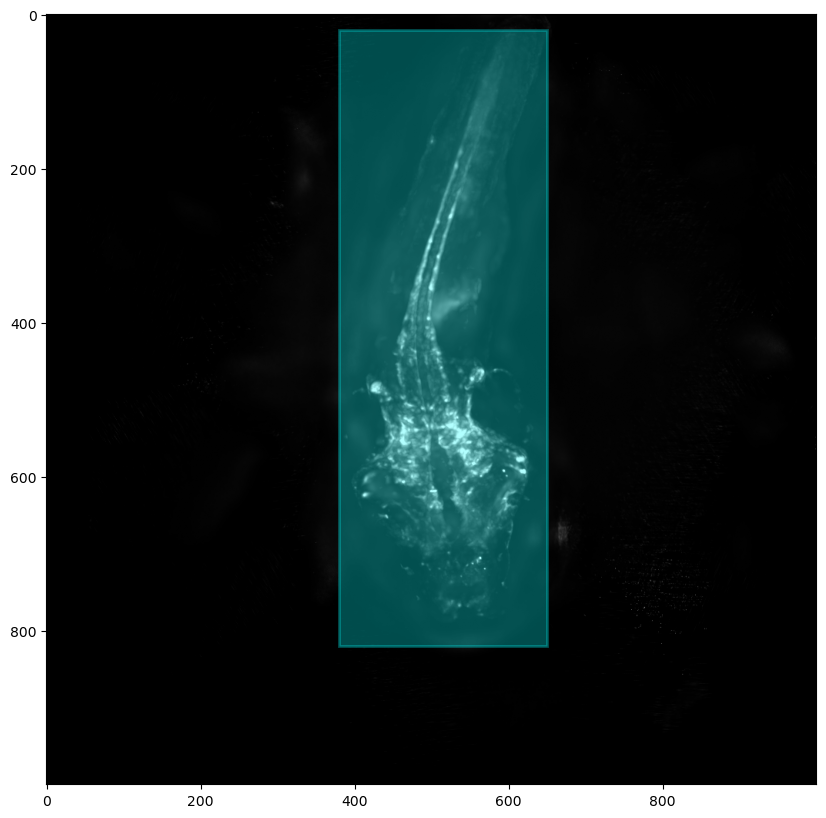

In [43]:
with h5py.File(paths.deconvolved, "r") as f:
    im = np.array(f["data"][0])
x1, y1 = 380, 20
x2, y2 = 650, 820

fig, ax = plt.subplots(1,1,figsize=(10,10))
ax.imshow(im.max(axis=0), cmap = "gray", vmax=10)
rect = plt.Rectangle(
        (x1, y1), x2 - x1, y2 - y1,
        linewidth=2, edgecolor="cyan", facecolor="cyan", alpha=0.3
    )
ax.add_patch(rect)
crop = (y1, y2, x1, x2)

In [40]:
import register, i_o
importlib.reload(register)
from register import average_volumes
importlib.reload(i_o)
from i_o import VolumeReader

In [45]:
#inspect theindexes to use for generating the refenrence - should be very little movement
ref_idx = [0,20,1]
ref_vol_unreg, video_fn = average_volumes(paths,
                                           ref_idx,
                                           preprocess = lambda x: x[:,crop[0]:crop[1],crop[2]:crop[3]],
                                           vmax=100,
                                           vmin=0,
                                           absolute_limits=False)

showvid(video_fn)

Error reading zpos from metadata: "Unable to synchronously open object (object 'zpos' doesn't exist)", setting zpos to None


Averaging:   0%|          | 0/20 [00:00<?, ?it/s]

In [42]:
video_fn

'/home/lubo12/hpc-rw/lfm/results/20250701_1501_LB_ZF_v552_f3_40fps_2/reference_f[0, 100, 1].mp4'

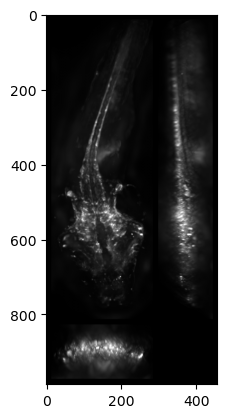

In [53]:
plt.imshow(create_projection_image(ref_vol_unreg, vmax=50, vmin=0, absolute_limits=False), cmap="gray")

In [50]:
#refine reference volume by registering every volume to the average and then averaging again
def register_reference(vol):
    return warpfield.register_volumes(vol[:,crop[0]:crop[1],crop[2]:crop[3]], ref_vol_unreg, recipe)[0]


ref_vol, video_fn = average_volumes(paths,
                                      ref_idx,
                                     preprocess = register_reference,
                                      vmax=100,
                                      vmin=0,
                                      absolute_limits=False,
                                      )

showvid(video_fn)

Error reading zpos from metadata: "Unable to synchronously open object (object 'zpos' doesn't exist)", setting zpos to None


Averaging:   0%|          | 0/20 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

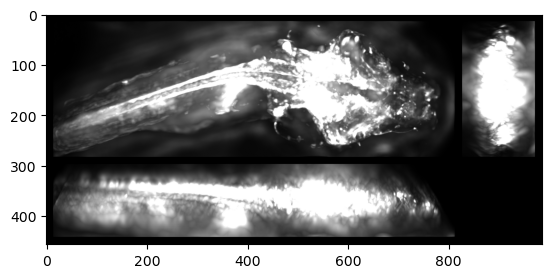

In [56]:
plt.imshow(create_projection_image(ref_vol, vmax=10, vmin=0, absolute_limits=False), cmap="gray")

### Test mini registration

In [ ]:
import register, i_o
importlib.reload(register)
from register import mini_registration
test_reg_frames = [0, 4020, 1]
video_fn, warpfields = mini_registration(paths, 
                                          test_reg_frames,
                                          ref_vol.transpose((0,2,1)),
                                          recipe,
                                          preprocess = lambda x: x[:,crop[0]:crop[1],crop[2]:crop[3]].transpose((0,2,1)),
                                          vmax=15,
                                          vmin=0,
                                          absolute_limits=True,
                                          fps=40,)
                  

Error reading zpos from metadata: "Unable to synchronously open object (object 'zpos' doesn't exist)", setting zpos to None


Mini registration:   0%|          | 0/4020 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Levels:   0%|          | 0/4 [00:00<?, ?it/s]

Repeats:   0%|          | 0/1 [00:00<?, ?it/s]

Repeats:   0%|          | 0/10 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

Repeats:   0%|          | 0/5 [00:00<?, ?it/s]

In [63]:
warpfields[0]

WarpMap(warp_field_shape=(3, 8, 49, 15), block_size=[32. 32. 32.], block_stride=[16. 16. 16.], transformation: (145, 800, 270) --> (145, 800, 270)

In [66]:
lazyh5(paths.deconvolved)

<IPython.core.display.JSON object>

In [73]:
ref_vol.transpose((0,2,1)).shape

(145, 270, 800)